In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [9]:
customers_df = pd.read_csv("/content/Customers.csv")
products_df = pd.read_csv("/content/Products.csv")
transactions_df = pd.read_csv("/content/Transactions.csv")

In [10]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')
merged_df = pd.merge(merged_df, products_df, on='ProductID')

In [11]:
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [12]:
merged_df.shape

(1000, 13)

In [13]:
merged_df["Price"] = merged_df["Price_x"]
merged_df.drop(["Price_x", "Price_y"], axis=1, inplace=True)

In [14]:
kmeans_data = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kmeans_data[['TotalValue', 'Quantity','Price']])

In [51]:
wcss = []
silhouette_scores = []
db_scores = []

In [52]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
    db_scores.append(davies_bouldin_score(scaled_data, kmeans.labels_))
    print(f"for cluster {n_clusters} the silhouette score is {silhouette_score(scaled_data, kmeans.labels_)}")
    print(f"for cluster {n_clusters} the db score is         {davies_bouldin_score(scaled_data, kmeans.labels_)}")

for cluster 2 the silhouette score is 0.3923894130812885
for cluster 2 the db score is         0.9423231164843165
for cluster 3 the silhouette score is 0.3724362900726579
for cluster 3 the db score is         0.95227765676549
for cluster 4 the silhouette score is 0.33071125179757666
for cluster 4 the db score is         0.9448437495439578
for cluster 5 the silhouette score is 0.3353833748488999
for cluster 5 the db score is         0.9183282802588962
for cluster 6 the silhouette score is 0.3363783203615679
for cluster 6 the db score is         0.9771187271475297
for cluster 7 the silhouette score is 0.3404476261890927
for cluster 7 the db score is         0.8970117755923618
for cluster 8 the silhouette score is 0.34313789639904724
for cluster 8 the db score is         0.8802041893433992
for cluster 9 the silhouette score is 0.3367969454682814
for cluster 9 the db score is         0.8569538613614833
for cluster 10 the silhouette score is 0.3390876171025726
for cluster 10 the db score is

DB score is lower the better and silhouette score is higher the better so number of clusters 8 is best choice

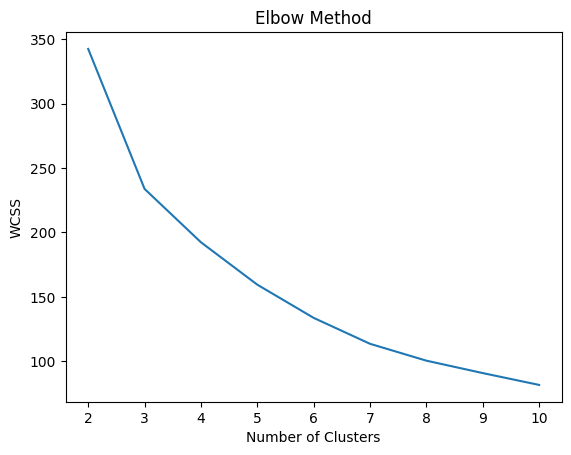

In [53]:
plt.plot(range(2,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
best_k = 8

kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_data)

KMeans(random_state=42)

In [55]:
db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print(f"DB Index: {db_index}")

DB Index: 0.8769641374852413


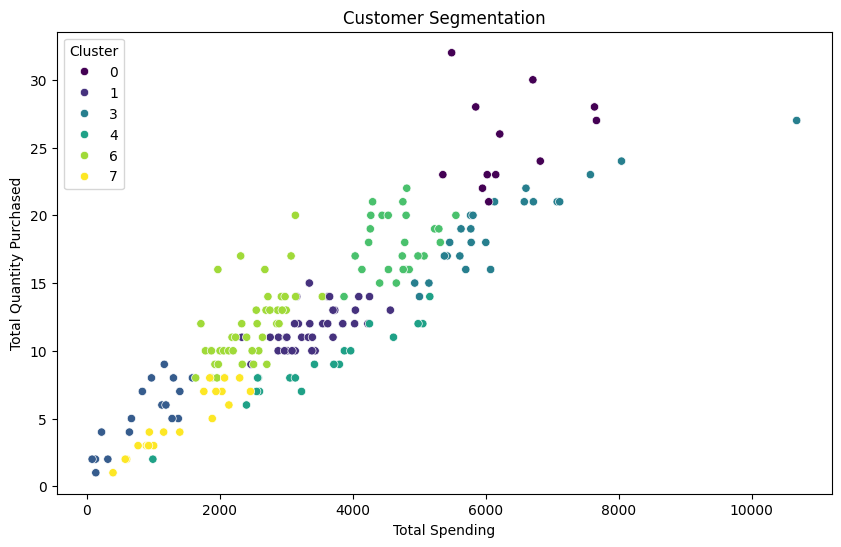

In [56]:
kmeans_data['Cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=kmeans_data, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity Purchased')
plt.show()

We got the best DB index for 2 clusters